In [76]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
from code.survey_processor_full import *
from code.model_vis import *
from code.clusterEDA import *
from code.fc import *

from sklearn.preprocessing import scale


import plotly.plotly as py
import plotly.graph_objs as go
from treeinterpreter import treeinterpreter as ti
import matplotlib.cm as cm
import cPickle as pickle
import seaborn as sns


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_pickle('data/df_id.pkl')

In [203]:
pub = df.dwelling.value_counts()
one = df[df.cluster==1].dwelling.value_counts()

In [204]:
b = pd.DataFrame([pub,one], index = ['pub',"one"])

In [205]:
pub_s = b.sum(axis = 1)[0]
one_s = b.sum(axis =1)[1]

In [206]:
b = b.apply(lambda x: x/x.sum(), axis =1)

In [207]:
b.replace(np.nan,0, inplace=True)

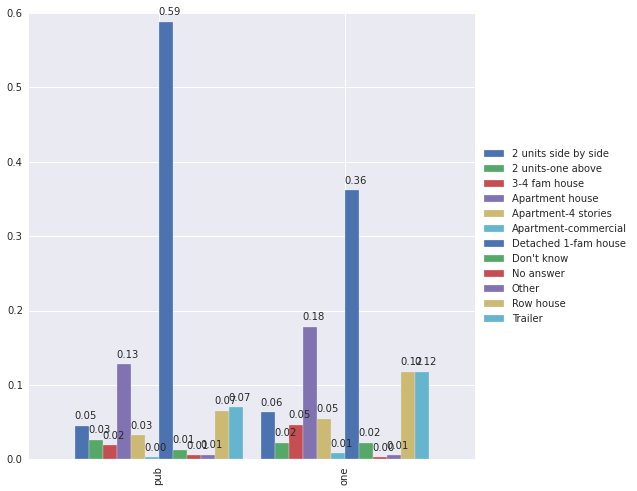

In [228]:
ax = b.plot(kind = 'bar',width = 0.9,figsize = (8,8))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+0.01,'%1.2f'%(height))
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [213]:
b

,2 units side by side,2 units-one above,3-4 fam house,Apartment house,Apartment-4 stories,Apartment-commercial,Detached 1-fam house,Don't know,No answer,Other,Row house,Trailer
pub,0.045200,0.025957,0.019020,0.127769,0.032446,0.002685,0.588051,0.012755,0.00537,0.005818,0.065115,0.069814
one,0.063014,0.021918,0.046575,0.178082,0.054795,0.008219,0.361644,0.021918,0.00274,0.005479,0.117808,0.117808


In [151]:
from ggplot import *

In [154]:
bt = b.T

AssertionError: incompatible sizes: argument 'height' must be length 2 or scalar

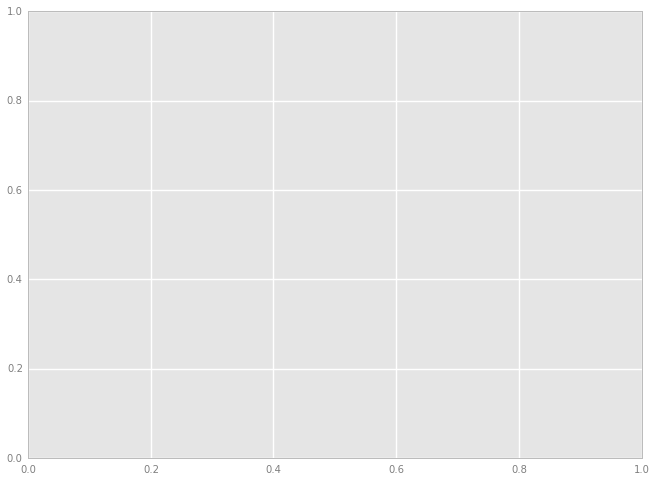

In [172]:
ggplot(b,aes(x=b.index))+geom_bar(stat="identity")

In [169]:
bt

,pub,one
2 units side by side,0.045200,0.063014
2 units-one above,0.025957,0.021918
3-4 fam house,0.019020,0.046575
Apartment house,0.127769,0.178082
Apartment-4 stories,0.032446,0.054795
Apartment-commercial,0.002685,0.008219
Detached 1-fam house,0.588051,0.361644
Don't know,0.012755,0.021918
No answer,0.005370,0.002740
Other,0.005818,0.005479
